In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, Matern, RBF, DotProduct, RationalQuadratic

/Users/justin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

def rmsle(y, y_pred): # linear algebra

    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# functions by https://www.kaggle.com/masayukixhirose/house-prices-advanced-regression-techniques/linear-model-roughly-modeling
def catcheck(df):
    iscat = np.zeros(df.shape[1])
    for c in range(df.shape[1]):
        if df.dtypes[c] == 'object':
            iscat[c] = 1
        else:
            iscat[c] = 0
    catdf = pd.DataFrame({'variable': df.columns, 'iscat': iscat})
    havecat = catdf[catdf.iscat == 1]
    catcolumn = havecat.variable.tolist()
    return catcolumn  

def NAcheck(df):
    isna = np.zeros(df.shape[1])
    for c in range(df.shape[1]):
        isna[c] = df.iloc[:, c].isnull().values.any()
            # For each columns, it return "True" if they have NaN.
    nandf = pd.DataFrame({'variable': df.columns, 'isna': isna})
    havenan = nandf[nandf.isna == 1]
    NAcolumn = havenan.variable.tolist()
    return NAcolumn


In [5]:
def rmsle(y, y_pred): # linear algebra
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)


In [6]:
train = pd.read_csv("./atf1.csv")
test = pd.read_csv("./atf.csv")
y_log = np.log1p(train["SalePrice"].values)
train1 = train.drop(["Id","SalePrice"], axis=1)
test1 = test.drop("Id", axis=1)

collist = set(NAcheck(train1) + NAcheck(test1))
train1 = train1.drop(collist, axis = 1)
test1 = test1.drop(collist, axis = 1)

train1 = train1.drop(catcheck(train1), axis = 1)
test1 = test1.drop(catcheck(test1), axis = 1)

print(train1.columns)

X = train1.values
X_test = test1.values


Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


In [4]:
def NAcheck(df):
    isna = np.zeros(df.shape[1])
    for c in range(df.shape[1]):
        isna[c] = df.iloc[:, c].isnull().values.any()
            # For each columns, it return "True" if they have NaN.
    nandf = pd.DataFrame({'variable': df.columns, 'isna': isna})
    havenan = nandf[nandf.isna == 1]
    NAcolumn = havenan.variable.tolist()
    return NAcolumn

In [5]:
def catcheck(df):
    iscat = np.zeros(df.shape[1])
    for c in range(df.shape[1]):
        if df.dtypes[c] == 'object':
            iscat[c] = 1
        else:
            iscat[c] = 0
    catdf = pd.DataFrame({'variable': df.columns, 'iscat': iscat})
    havecat = catdf[catdf.iscat == 1]
    catcolumn = havecat.variable.tolist()
    return catcolumn

In [71]:
len(X)

17

In [16]:
kernel = 1.0**2 * Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=0.5)
gp = GaussianProcessRegressor(kernel=kernel, alpha=5e-9, optimizer='fmin_l_bfgs_b', 
                                n_restarts_optimizer=0, normalize_y=False, copy_X_train=True,
                                random_state=2016)
clf = Pipeline([('scaler', StandardScaler()), ('gp', gp)])     
y_log_centered = y_log - y_log.mean()
y_pred = cross_val_predict(clf, X, y_log_centered, cv=5, n_jobs=-1)
y = np.expm1(y_log)
y_pred = np.expm1(y_pred + y_log.mean())

kernel = kernels.SE() + kernels.Noise(.1)
gp = GaussianProcessRegressor(kernel=kernel, alpha=5e-9, optimizer='fmin_l_bfgs_b', 
                                n_restarts_optimizer=0, normalize_y=False, copy_X_train=True,
                                random_state=2016)
clf = Pipeline([('scaler', StandardScaler()), ('gp', gp)])     
y_log_centered = y_log - y_log.mean()
y_pred = cross_val_predict(clf, X, y_log_centered, cv=5, n_jobs=-1)
y = np.expm1(y_log)
y_pred = np.expm1(y_pred + y_log.mean())

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)


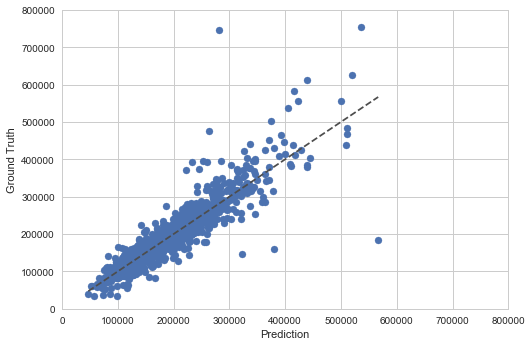

In [18]:
plt.scatter(y_pred, y)
plt.plot([min(y_pred),max(y_pred)], [min(y_pred),max(y_pred)], ls="--", c=".3")
plt.xlim([0,800000])
plt.ylim([0,800000])
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
plt.show()


In [19]:
clf.fit(X,y_log_centered)
prediction = clf.predict(X_test)


C:\Users\kun35\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\kun35\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:1362: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]


In [20]:
prediction

array([-0.27276422, -0.11009988,  0.09434485, ..., -0.0349212 ,
       -0.26681151,  0.32163221])

In [21]:
print(clf.steps[1][1].kernel_)

1.41**2 * Matern(length_scale=208, nu=0.5)


In [22]:
prediction = np.expm1(prediction + y_log.mean())

In [23]:
prediction

array([126916.58016323, 149335.51355342, 183211.55157197, ...,
       160995.22429533, 127674.33662578, 229965.65551151])

In [51]:
y = pd.read_csv('./research.csv',index_col=0)

In [40]:
y

,박원순,김문수,안철수
20180407,50.3,16.6,20.4
20180409,51.5,12.7,21.0
20180410,54.9,17.1,17.5
20180414,50.9,20.4,19.0
20180415,51.3,9.5,18.4
20180417,52.1,10.1,13.3
20180503,48.3,9.3,16.5
20180505,59.5,14.9,13.0
20180506,42.5,17.0,21.4
20180507,50.3,10.3,12.0


In [52]:
y_log = np.log1p(y["박원순"].values)

In [53]:
train1 = pd.read_csv('./ptf12_2.csv',index_col=0)

In [46]:
train1

,怨듭빟,援??,洹몃깷,湲곗궗,源寃쎌닔,源臾몄닔,?섎씪,?덈Т,?ㅼ씠踰??꾧?,?꾧뎄,...,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100
20180407,0.017362,0.144981,0.085579,0.057388,0.018648,0.184247,0.065443,0.065443,0.007048,0.057388,...,0.035238,0.002043,0.047320,0.017116,0.092627,0.069470,0.046313,0.079538,0.065443,0.106722
20180409,0.023891,0.141312,0.073135,0.060119,0.002551,0.132015,0.068797,0.051442,0.009297,0.053922,...,0.049583,0.000000,0.044625,0.017354,0.073135,0.064458,0.037187,0.055781,0.094208,0.105364
20180410,0.006498,0.236568,0.082822,0.086025,0.000000,0.141621,0.102498,0.061544,0.014871,0.061316,...,0.020133,0.006962,0.080763,0.070467,0.095863,0.100896,0.038894,0.039809,0.055825,0.082593
20180414,0.009997,0.165747,0.063611,0.087801,0.048861,0.070778,0.074362,0.061819,0.054652,0.053756,...,0.016127,0.027265,0.060027,0.060027,0.063611,0.125430,0.020606,0.020606,0.028670,0.053756
20180415,0.002771,0.148985,0.040798,0.048630,0.257693,0.021856,0.059375,0.033148,0.084874,0.039341,...,0.014024,0.332372,0.052090,0.062472,0.050997,0.102177,0.024042,0.014571,0.017121,0.028231
20180417,0.004412,0.206114,0.060650,0.101003,0.063403,0.020297,0.070074,0.044219,0.042286,0.064033,...,0.016431,0.225257,0.056301,0.050502,0.054609,0.104869,0.026821,0.024647,0.018123,0.049293
20180503,0.010418,0.212936,0.108179,0.082162,0.012681,0.075315,0.104071,0.080108,0.010955,0.047243,...,0.026703,0.080566,0.071207,0.036288,0.103387,0.149260,0.033549,0.154053,0.065729,0.074630
20180505,0.007444,0.121090,0.102743,0.029355,0.007552,0.249519,0.055041,0.069719,0.011008,0.051372,...,0.029355,0.022333,0.080727,0.025686,0.106412,0.099074,0.058710,0.055041,0.088065,0.146776
20180506,0.005665,0.208146,0.079705,0.048737,0.017239,0.042137,0.081228,0.044168,0.006092,0.060413,...,0.014215,0.055618,0.050260,0.026399,0.088335,0.113211,0.036045,0.050767,0.095950,0.089858
20180507,0.014771,0.275620,0.082166,0.079046,0.024615,0.028082,0.194494,0.066565,0.013521,0.055124,...,0.052004,0.067523,0.066565,0.036403,0.166412,0.289142,0.033282,0.046803,0.064485,0.096727


In [54]:
test1 = pd.read_csv('./ptf12_3.csv',index_col=0)

In [56]:
#kernel = 1*RBF(length_scale=1.0)
kernel = 1.0**2 * Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=0.5)
gp = GaussianProcessRegressor(kernel=kernel, alpha=5e-9, optimizer='fmin_l_bfgs_b', 
                                n_restarts_optimizer=0, normalize_y=False, copy_X_train=True,
                                random_state=2016)
clf = Pipeline([('scaler', StandardScaler()), ('gp', gp)])     
y_log_centered = y_log - y_log.mean()
y_pred = cross_val_predict(clf, X, y_log_centered, cv=5, n_jobs=-1)
y = np.expm1(y_log)
y_pred = np.expm1(y_pred + y_log.mean())


In [57]:
y_pred

array([51.8494156 , 51.84941554, 51.84941561, 51.84941561, 51.84941561,
       51.8593613 , 51.94290261, 51.85025767, 51.86649046, 51.90112032,
       51.37958911, 51.83315037, 51.64394094, 51.64749832, 51.84875437,
       51.84940876, 51.84939154, 51.84842653, 51.84938593, 51.84950764,
       51.84941601, 51.84941193])

In [58]:
clf.fit(X,y_log_centered)
prediction = clf.predict(X_test)

C:\Users\kun35\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:1362: RuntimeWarning: invalid value encountered in true_divide
  / np.sqrt(D.sum(2))[:, :, np.newaxis]


In [59]:
prediction

array([-2.97558820e-02, -6.63348049e-03,  5.61176868e-02, -1.81278520e-02,
       -1.04502764e-02,  4.73027031e-03, -6.95225256e-02,  1.35196617e-01,
       -1.94685582e-01, -2.97558820e-02,  8.60758536e-02,  2.15373770e-02,
        1.96838097e-02,  1.56456602e-01,  8.25975916e-02, -5.54236110e-02,
        1.45065111e-01, -3.36621342e-02, -1.42816961e-02, -1.23641512e-02,
       -1.34466764e-01, -9.83310824e-02, -6.06586324e-13, -1.93759893e-10,
       -1.75625523e-18, -7.00838004e-14,  8.84763279e-11,  1.36985934e-10,
        1.12731893e-10, -5.41776924e-10,  1.72585459e-09,  1.38913683e-10,
        2.34939585e-10,  3.07908526e-09, -6.86321741e-13, -2.30321104e-11,
        1.00004603e-10])

In [60]:
prediction = np.expm1(prediction + y_log.mean())

In [38]:
#김문수
prediction

array([16.59999971, 12.70000004, 17.09999966, 20.39999933,  9.50000024,
       10.10000021,  9.30000025, 14.89999987, 16.99999967, 10.3000002 ,
       10.60000018, 10.50000018, 10.90000016, 15.99999975, 23.49999898,
        9.90000022, 18.49999953, 11.20000015,  9.10000026, 13.59999996,
       15.89999977, 12.90000002, 13.17442914, 13.23755226, 13.17445129,
       13.17445129, 13.17445129, 13.16052991, 13.17445112, 13.17496159,
       13.13294433, 13.17401274, 13.18644225, 13.16268389, 13.17459952,
       13.17452293, 13.17602229])

In [50]:
#안철수
prediction

array([20.3999993 , 20.9999992 , 17.49999975, 18.99999952, 18.39999961,
       13.30000029, 16.49999989, 13.00000032, 21.39999913, 12.00000042,
       14.80000011, 15.20000006, 12.40000038, 13.30000029, 12.70000035,
       15.66231313, 17.29999977, 12.30000039, 20.19999933, 13.90000022,
       15.50000002, 10.90000053, 20.59999926, 15.66231313, 15.66231313,
       15.66231313, 15.66231313, 15.66231313, 15.66231313, 15.66231313,
       15.66231313, 15.66231313, 15.66231313, 15.66231313, 15.66231313,
       15.66231313, 15.66231313, 15.66231313])

In [61]:
#박원순
prediction

array([50.30000105, 51.50000024, 54.89999783, 50.90000065, 51.30000038,
       52.09999983, 48.30000237, 59.49999435, 42.50000585, 50.30000105,
       56.59999658, 52.9999992 , 52.89999927, 60.79999333, 56.39999673,
       49.00000191, 60.09999388, 50.10000119, 51.10000051, 51.20000045,
       45.20000429, 46.90000325, 51.84941561, 51.8494156 , 51.84941561,
       51.84941561, 51.84941561, 51.84941561, 51.84941561, 51.84941558,
       51.8494157 , 51.84941561, 51.84941562, 51.84941577, 51.84941561,
       51.84941561, 51.84941561])